# 의사결정 트리

   Income  Lot_Size Ownership
0    60.0      18.4     Owner
1    85.5      16.8     Owner
2    64.8      21.6     Owner
3    61.5      20.8     Owner
4    87.0      23.6     Owner
Index(['Income', 'Lot_Size', 'Ownership'], dtype='object')


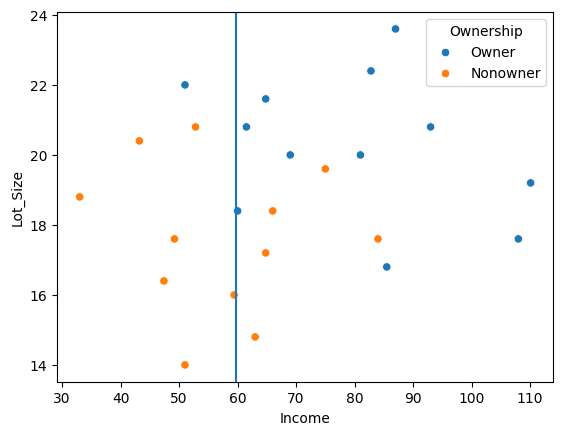

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

g_df = pd.read_csv('http://joy-bae.github.io/RidingMowers.csv')
print(g_df.head())
print(g_df.columns)


sns.scatterplot(x='Income' , y='Lot_Size' , data=g_df , hue='Ownership')

plt.axvline(x=59.7) # 대충 그렸다고 가정하는 거임
plt.show()

## 지니계수와 엔트로피 계산

In [ ]:
# 원래는 엔트로피가 1
    # left 엔트로피는 0.544 , right 엔트로피는 0.896 => 평균 0.779 : 엔트로피가 줄었다.

## 분할 트리 실행

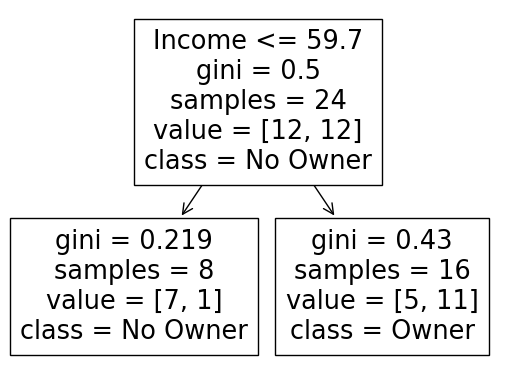

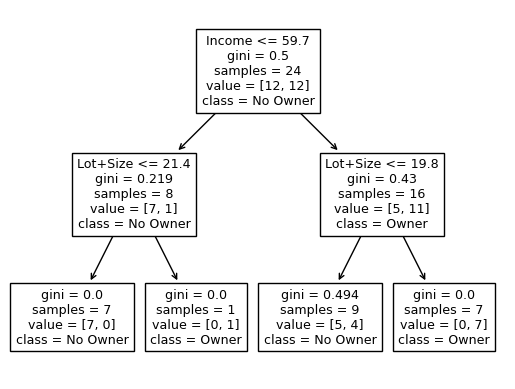

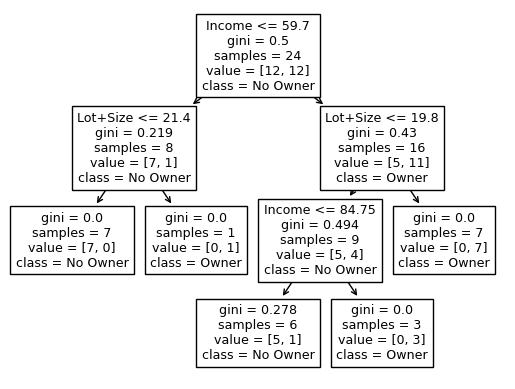

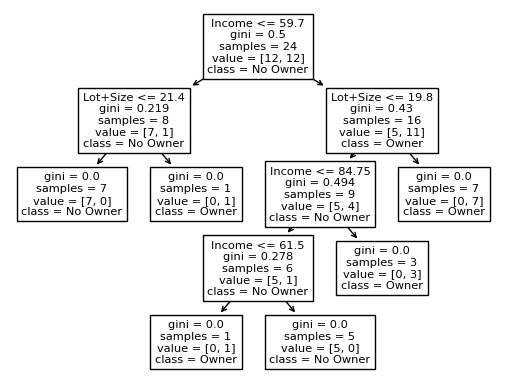

In [11]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
for md in [1,2,3,4]: # tree의 깊이
    dt = DecisionTreeClassifier(random_state=0 , max_depth=md)
    dt.fit(g_df.drop(columns=['Ownership']) , g_df['Ownership']) # X : 원래 data에서 'Ownership' 삭제 , y : 'Ownership'

    plot_tree(dt , feature_names=['Income' , 'Lot_Size'] , class_names=['No Owner' , 'Owner'])

    plt.show()

### 예측 결과

In [15]:
newdata =[[100,16]]

print('예측결과는 : ' , dt.predict(newdata))

예측결과는 :  ['Owner']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# 개인 대출 수락 여부의 결정

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

b_df = pd.read_csv('http://joy-bae.github.io/UniversalBank.csv' , index_col=0)
b_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# 분류 트리의 실행
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split

X = b_df.drop(columns=['PersonalLoan' , 'ZIP Code']) # 원래 ID도 drop해야하는데 index_col해서 ㄱㅊ
y = b_df['PersonalLoan']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.4 , random_state=1)

fdt = DecisionTreeClassifier(random_state=1) # max_depth 설정 안 하면 끝까지 학습 , 과적합의 위험이 있다.

fdt.fit(X_train , y_train)

plot_tree(fdt , feature_names=X.columns)

## 정확도

In [26]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred = fdt.predict(X_train)
print(confusion_matrix(y_train , y_pred))
print(classification_report(y_train , y_pred))

y_pred = fdt.predict(X_test)
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))

# 학습데이터 오류 없지만 , 그 중 noise에 대해 학습할 수 있기 때문에
# 검증 데이터셋의 오류율이 증가하기 전까지 학습데이터를 학습한다.

[[2713    0]
 [   0  287]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2713
           1       1.00      1.00      1.00       287

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

[[1790   17]
 [  25  168]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1807
           1       0.91      0.87      0.89       193

    accuracy                           0.98      2000
   macro avg       0.95      0.93      0.94      2000
weighted avg       0.98      0.98      0.98      2000



## 트리모델의 성장 중단시키기 ( 과적합 방지)

[Text(0.375, 0.875, 'Income <= 110.5\ngini = 0.173\nsamples = 3000\nvalue = [2713, 287]'),
 Text(0.25, 0.625, 'gini = 0.031\nsamples = 2363\nvalue = [2326, 37]'),
 Text(0.5, 0.625, 'Education <= 1.5\ngini = 0.477\nsamples = 637\nvalue = [387, 250]'),
 Text(0.25, 0.375, 'Family <= 2.5\ngini = 0.192\nsamples = 400\nvalue = [357, 43]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 355\nvalue = [355, 0]'),
 Text(0.375, 0.125, 'gini = 0.085\nsamples = 45\nvalue = [2, 43]'),
 Text(0.75, 0.375, 'Income <= 116.5\ngini = 0.221\nsamples = 237\nvalue = [30, 207]'),
 Text(0.625, 0.125, 'gini = 0.434\nsamples = 44\nvalue = [30, 14]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 193\nvalue = [0, 193]')]

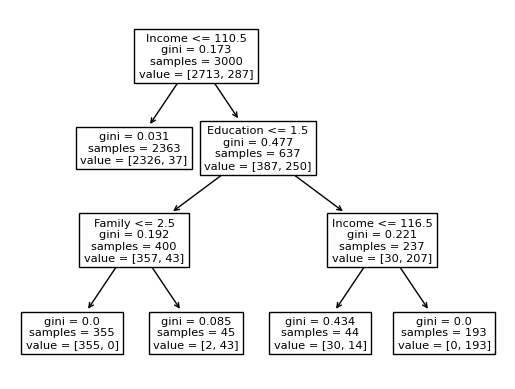

In [27]:
# 1. 트리의 깊이
# 2. 분할에 필요한 노드의 최소 레코드 수
# 3. 단말 노드의 최소 레코드 수 : 트리를 만들었을 때 최소 노드는 이정도 있어야지
# 4. 불순도의 최소 감소량 등을 지정 : 트리가 내려갈 때 최소한 불순도는 이 정도는 줄어야하낟. ==> 모델 생성할 때 파라미터로 설정

from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split

sdt = DecisionTreeClassifier(random_state=1 , max_depth=30 , min_samples_split=20 , min_impurity_decrease=0.01)

sdt.fit(X_train , y_train)

plot_tree(sdt , feature_names=X.columns)

In [28]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred = sdt.predict(X_train)
print(confusion_matrix(y_train , y_pred))
print(classification_report(y_train , y_pred))

y_pred = sdt.predict(X_test)
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))

[[2711    2]
 [  51  236]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2713
           1       0.99      0.82      0.90       287

    accuracy                           0.98      3000
   macro avg       0.99      0.91      0.94      3000
weighted avg       0.98      0.98      0.98      3000

[[1804    3]
 [  43  150]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1807
           1       0.98      0.78      0.87       193

    accuracy                           0.98      2000
   macro avg       0.98      0.89      0.93      2000
weighted avg       0.98      0.98      0.98      2000



# 파라미터 조절하기

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid ={
    'max_depth' : [10,20,30,40] ,
    'min_samples_split' : [20,40,60,80,100] ,
    'min_impurity_decrease' : [0,0.0005,0.001,0.005,0.01]
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1) , param_grid , cv=5 , n_jobs=-1)
# cv : 교차 검증(?)
# n_jobs=-1 는 모든 사용가능한 CPU를 사용하도록 하는 옵션션

gridSearch.fit(X_train , y_train)
print('Initial score : ', gridSearch.best_score_)
print('Initial parameters : ',gridSearch.best_params_)

initClassTree = gridSearch.best_estimator_ # best 모델을 넣는다.

Initial score :  0.9876666666666667
Initial parameters :  {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}


## 더 섬세하게

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid ={
    'max_depth' : list(range(2,16)) ,
    'min_samples_split' : list(range(10,22)) ,
    'min_impurity_decrease' : [0,0.0005,0.001,0.005,0.01]
}

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1) , param_grid , cv=5 , n_jobs=-1)

gridSearch.fit(X_train , y_train)
print('Initial score : ', gridSearch.best_score_)
print('Initial parameters : ',gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_ # best 모델을 넣는다.

Initial score :  0.9883333333333333
Initial parameters :  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 20}


## 성능평가

In [36]:
# init
y_pred = initClassTree.predict(X_train)
print(confusion_matrix(y_train , y_pred))
print(classification_report(y_train , y_pred))

y_pred = initClassTree.predict(X_test)
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))



# best
y_pred = bestClassTree.predict(X_train)
print(confusion_matrix(y_train , y_pred))
print(classification_report(y_train , y_pred))

y_pred = bestClassTree.predict(X_test)
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))

[[2707    6]
 [  21  266]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2713
           1       0.98      0.93      0.95       287

    accuracy                           0.99      3000
   macro avg       0.99      0.96      0.97      3000
weighted avg       0.99      0.99      0.99      3000

[[1796   11]
 [  24  169]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1807
           1       0.94      0.88      0.91       193

    accuracy                           0.98      2000
   macro avg       0.96      0.93      0.95      2000
weighted avg       0.98      0.98      0.98      2000

[[2704    9]
 [  19  268]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2713
           1       0.97      0.93      0.95       287

    accuracy                           0.99      3000
   macro avg       0.98      0.97      0.97    

In [37]:
imp_df = pd.DataFrame(bestClassTree.feature_importances_ , index = X.columns) # 불순도를 줄이기 위해 이 feature들이 중요하다.
imp_df

,0
Age,0.003945
Experience,0.003498
Income,0.384632
Family,0.154059
CCAvg,0.048288
Education,0.390182
Mortgage,0.000000
SecuritiesAccount,0.000000
CDAccount,0.015396
Online,0.000000


# 의사결정 트리 , entropy로 만들기 , 기본은 gini

[Text(0.5, 0.75, 'Income <= 92.5\nentropy = 0.455\nsamples = 3000\nvalue = [2713, 287]'),
 Text(0.25, 0.25, 'entropy = 0.056\nsamples = 2201\nvalue = [2187, 14]'),
 Text(0.75, 0.25, 'entropy = 0.926\nsamples = 799\nvalue = [526, 273]')]

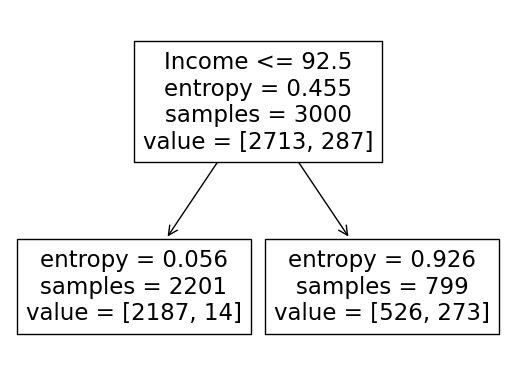

In [38]:
edt = DecisionTreeClassifier(random_state=1 , max_depth=1 , criterion='entropy')

edt.fit(X_train , y_train)

plot_tree(edt , feature_names=X.columns)